## **得到数据**

### 数据预览

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


以上信息注意到：total_bedrooms缺少数据

ocean_proximity是对象，我们来看一下它有几个对象种类,用value_counts()

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe()可以查看数据的数据属性

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


百分比表示有这个百分率的数据小于后面给出的数值，比如housing_median_age那列，表示25%的区域的housing_median_age小于18，50%的区域的housing_median_age小于29，25%的区域的housing_median_age小于37

另一个对数据获得直观感受的方法是对数据属性画直方图，hist()

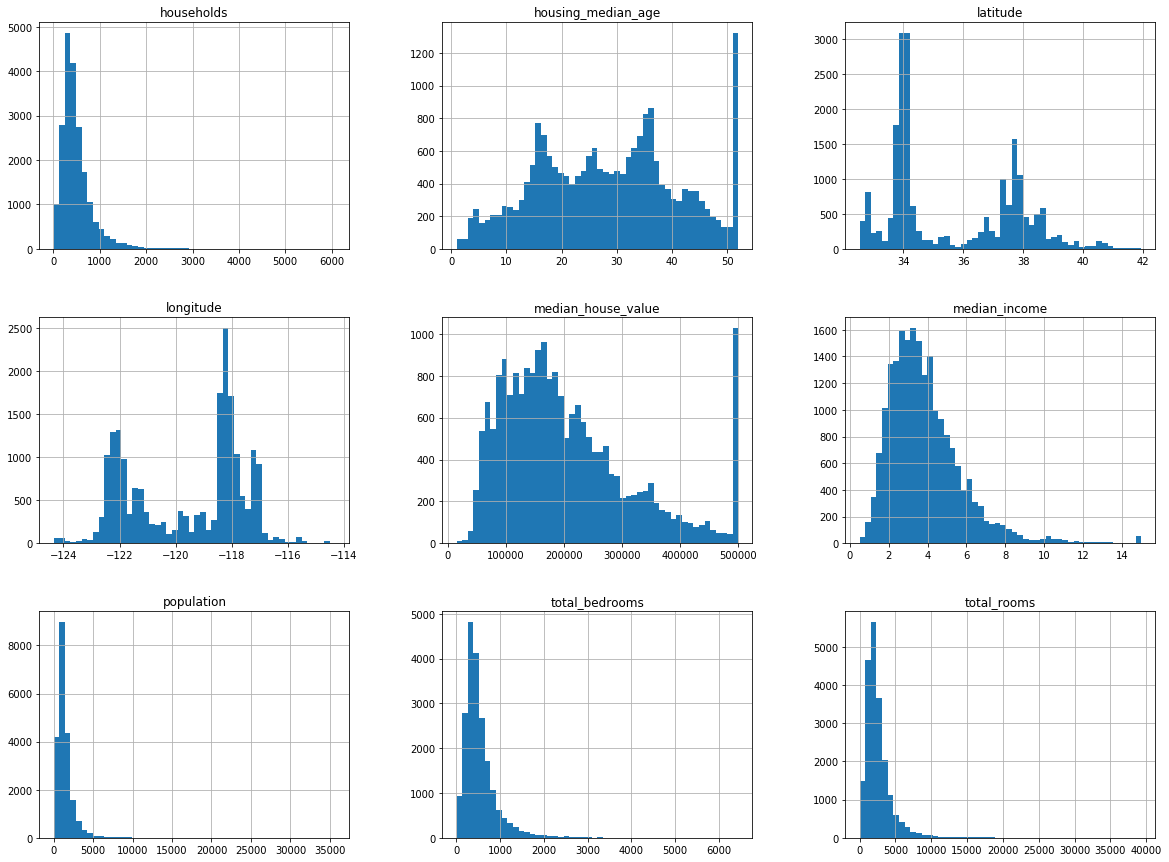

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) #bins表示图中条数，figsize表示图大小
plt.show()

上面直方图可以看出，median_income, median_house_value, housing_median_age数据均有不同程度的缩放，还有部分直方图数据明显偏图左侧。

### 创建测试集

In [7]:
import numpy as np
def split_train_test(data,test_ratio):
    m = len(data)
    np.random.seed(1)
    shuffled_indices = np.random.permutation(m)
    test_set_size = int(m * test_ratio)
    train_set_indices = shuffled_indices[test_set_size:]
    test_set_indices = shuffled_indices[:test_set_size]
    return data.iloc[train_set_indices], data.iloc[test_set_indices]    

In [8]:
train_set, test_set = split_train_test(housing, 0.2)

分割测试集函数里加入了np.random.seed(1)，保证了多次运行程序，测试集相同。否则运行多次，整个数据集数据都被运行过一遭了。

<font color=red size=3>但是如果你获得了新的数据集，训练测试集将被重新分配，避免这种情况的一个办法是给每条数据加上唯一不变的标识。</font>   
一个常见的解决方案是使用每个实例的标识符来决定它是否应该进入测试集（假设实例具有唯一且不可变的标识符）。 例如，您可以计算每个实例的标识符的哈希值，仅保留哈希值的最后一个字节，如果此值小于或等于51（256的~20％），则将实例放入测试集中。 这可确保测试集在多次运行中保持一致，即使您刷新数据集也是如此。 新测试集将包含20％的新实例，但它不包含以前在训练集中的任何实例。 

详细内容暂且不表，详情参见书本"Hands-On Machine Learning with Scikit-Learn and TensorFlow" P50

Scikit-Learn提供了一些分割数据集的函数，最简单的函数是train_test_split，与上文自行编写的split_train_test函数功能一致。

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size = 0.2, random_state = 1)

目前我们考虑的对测试集的采样是单纯的随机采样，这在大数据集情况下是没有问题的，但是在小数据集下，将会引来<font color=red>采样偏差</font>，如果要保证采样的代表性，可以采用<font color=red>分层采样(stratified sampling)</font>，详情参见书本"Hands-On Machine Learning with Scikit-Learn and TensorFlow" P51-53

假使你被告知median_income是预测房价的重要属性，因此希望测试集能够覆盖整个数据集median_income的各个类别。现在median_income是连续数字属性，所以我们要创建收入类别属性。  
现要进行分层采样，每层数据要有足够多的实例，层数估计也很重要，否则容易引入偏差。也就是说<font color=red>分层不应有太多层，每层足够大</font>。

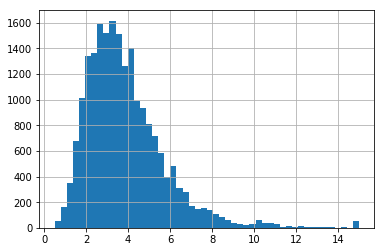

In [10]:
housing["median_income"].hist(bins=50)
plt.show()

上图是median_income属性的直方图可以看出，大部分数据落在2-5之间。  
以下代码通过将收入中位数除以1.5（以限制收入类别的数量），并使用ceil（具有离散类别）进行四舍五入，然后将大于5的所有类别合并为类别5来创建收入类别属性：

In [11]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)   #离散并四舍五入

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [13]:
housing["income_cat"] = np.where(housing["income_cat"] < 5,housing["income_cat"],5.0)  
#np.where(condition,x,y) : if  condition == True:return x,else: return y

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


现在即可根据income_cat属性进行分层采样(stratified sampling)，可以使用Scikit-Learn的StratifiedShuffleSplit类。

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=1)

In [17]:
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
housing["income_cat"].value_counts() / len(housing) #类别占比

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)  #可以看出测试集类别分布与整个数据集分布十分接近

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

接下来需要将新添加的income_cat属性删除，恢复原始数据。

In [20]:
for set in (strat_train_set,strat_test_set):
    set.drop(["income_cat"],axis=1,inplace=True)

## 数据可视化

### 可视化地理数据
由于有地理信息（纬度和经度），所以最好创建所有区域的散点图以可视化数据

In [21]:
strat_train_copy = strat_train_set.copy() #复制一份数据，以免损坏原有数据

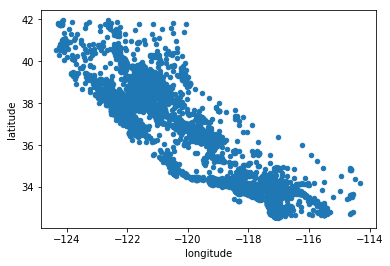

In [22]:
strat_train_copy.plot(kind="scatter",x="longitude",y="latitude")
plt.show()

上图没有特别的特征，下面我们设置一下alpha参数（表示透明度，0表示完全透明，1表示不透明），来找到数据轻度较大的地方。

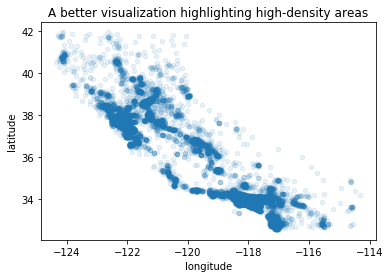

In [23]:
strat_train_copy.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
plt.title("A better visualization highlighting high-density areas")
plt.show()

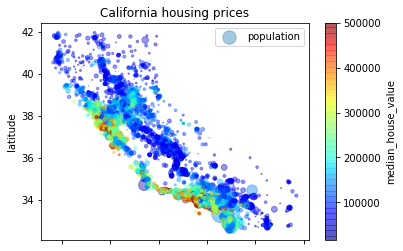

In [24]:
strat_train_copy.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
                     s=strat_train_copy["population"]/100,label="population",
                     c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.title("California housing prices")
plt.show()

上图可以看出房价与地理位置和人口密度有关。

### 寻找相关性

属性之间的相关性如下

In [25]:
corr_matrix = strat_train_copy.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924134,-0.111588,0.044415,0.070146,0.100851,0.055818,-0.013672,-0.043824
latitude,-0.924134,1.000000,0.015882,-0.034892,-0.066266,-0.107384,-0.069504,-0.082153,-0.146748
housing_median_age,-0.111588,0.015882,1.000000,-0.361921,-0.321678,-0.301220,-0.305833,-0.115020,0.107684
total_rooms,0.044415,-0.034892,-0.361921,1.000000,0.929588,0.859194,0.917847,0.198109,0.133566
total_bedrooms,0.070146,-0.066266,-0.321678,0.929588,1.000000,0.878086,0.979825,-0.007167,0.049941
population,0.100851,-0.107384,-0.301220,0.859194,0.878086,1.000000,0.907188,0.008148,-0.025008
households,0.055818,-0.069504,-0.305833,0.917847,0.979825,0.907188,1.000000,0.013529,0.065778
median_income,-0.013672,-0.082153,-0.115020,0.198109,-0.007167,0.008148,0.013529,1.000000,0.684828
median_house_value,-0.043824,-0.146748,0.107684,0.133566,0.049941,-0.025008,0.065778,0.684828,1.000000


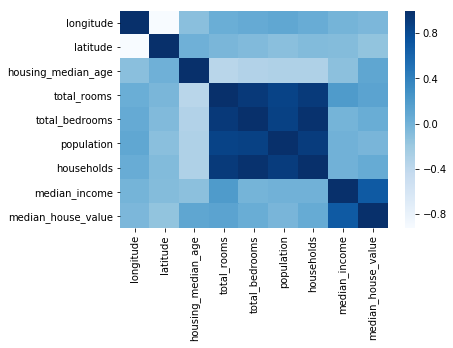

In [26]:
import seaborn as sns  #热力图
sns.heatmap(corr_matrix,cmap="Blues")

将与房价有关的属性相关系数排序显示：

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False) #降序输出

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

相关系数为负表示负相关，0表示不相关，正表示正相关。
<font color=red>注意相关系数仅能反映线性关系（如：x上升，然后y上升），它可能会错过非线性关系（如：x接近于0，然后y上升）</font>

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


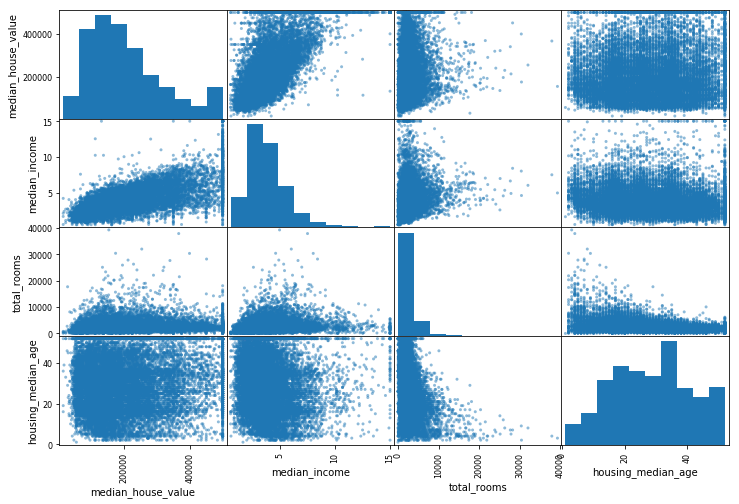

In [28]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(strat_train_copy[attributes],figsize=(12,8))
plt.show()

上图主对角线是直方图。和median_house_value最相关的属性是median_income，单独画出它们的散点图。  
详情参见书本"Hands-On Machine Learning with Scikit-Learn and TensorFlow" P55-58

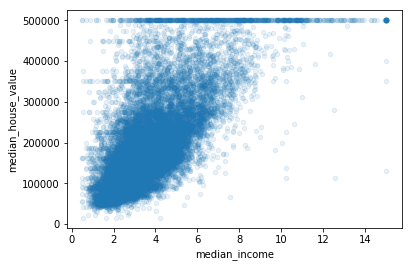

In [29]:
strat_train_copy.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()

### 测试属性组合

在为机器学习算法准备数据之前，您可能想要做的最后一件事是尝试各种属性组合。 例如，如果您不知道有多少家庭，则区内的房间总数不是很有用。 你真正想要的是每个家庭的房间数量。 同样，卧室总数本身并不是很有用：您可能希望将它与房间数量进行比较。 每个家庭的人口似乎也是一个有趣的属性组合。 让我们创造这些新的属性。

In [30]:
strat_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 740 to 1318
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [31]:
strat_train_copy["rooms_per_household"] = strat_train_copy["total_rooms"]/strat_train_copy["households"]
strat_train_copy["bedrooms_per_room"] = strat_train_copy["total_bedrooms"]/strat_train_copy["total_rooms"]
strat_train_copy["population_per_household"] = strat_train_copy["population"]/strat_train_copy["households"]
corr_matrix = strat_train_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684828
rooms_per_household         0.171947
total_rooms                 0.133566
housing_median_age          0.107684
households                  0.065778
total_bedrooms              0.049941
population                 -0.025008
population_per_household   -0.026596
longitude                  -0.043824
latitude                   -0.146748
bedrooms_per_room          -0.256396
Name: median_house_value, dtype: float64

新的bedroom_per_room属性与median_house_value的相关性远高于房间或卧室的总数。 显然，bedroom_per_room较小的房屋往往更贵。 每个家庭的房间数量也比一个地区的房间总数有更多信息 - 显然房屋越大，它们就越贵。  
这轮探索不一定非常彻底; 重点是从右脚开始，快速获得有助于您获得第一个合理的原型的见解。 但这是一个迭代过程：一旦您启动并运行原型，您就可以分析其输出以获得更多见解并回到此探索步骤。

## 为机器学习算法准备数据

分离目标数据

In [32]:
housing = strat_train_set.drop("median_house_value",axis=1) #并未改变strat_train_set本身，inplace默认False
housing_labels = strat_train_set["median_house_value"].copy()

### 数据清洗

In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 740 to 1318
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


total_bedrooms数据有缺失。  
有三种操作如下：  
- 删除有缺失数据的实例
- 删除整个属性
- 给缺失值赋值（零，均值，中值等）  
完成上述操作可借助DataFrame的dropna(),drop(),fillna()方法。

```
housing.dropna(subset=["total_bedrooms"])  #option 1
housing.drop("total_bedrooms",axis=1)    #option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)  #option 3
```
如果选择方法三，注意保存计算的中值，因为同样也要用中值填充测试集中的缺失值。

Scikit-Learn提供了一个处理缺失值的类：<font color=red>**Imputer**</font>  
首先创建一个实例:

In [34]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

因为中值只能填充到数字属性的缺失值中，所以文本属性类ocean_proximity先去掉再填充。

In [35]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [36]:
imputer.fit(housing_num)  #将imputer实例fit到训练数据上

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [37]:
imputer.statistics_   #各个属性的中值均存于此

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [38]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 740 to 1318
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [39]:
X = imputer.transform(housing_num)  #这是一个展开的包含转换特征的numpy数组，下面恢复DataFrame格式

In [40]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [41]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


### 处理文本和类别属性

将ocean_proximity属性转换成数字属性，Scikit-Learn提供了这样一个transformer：<font color=red>**LabelEncoder**</font>

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [43]:
np.shape(housing_cat_encoded) #一维

(16512,)

In [44]:
encoder.classes_  #分别对应0,1,2,etc

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

这种表示有一个问题是数字0和4的距离比1和2的距离远，但是代表的物理含义并非如此，'<1H OCEAN'和'NEAR OCEAN'之间的距离比 'INLAND'和 'ISLAND'之间距离小。解决这种问题的一般方法是给每个元素建立二值属性，叫做<font color=red>**one-hot encoding**</font>  
Scikit-Learn 提供一个 OneHotEncoder 编码器来将整型数值转换成one-hot向量。

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))  #reshape(-1,1)表示重新设置矩阵大小，-1表示自动计算行数
#fit_transform 接受二维数组，所以reshape

In [46]:
np.shape(housing_cat_encoded.reshape(-1,1))  #二维

(16512, 1)

In [47]:
np.shape(housing_cat_1hot)

(16512, 5)

稀疏矩阵转换为稠密Numpy数组，调用toarray()方法

In [48]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [49]:
np.shape(housing_cat_1hot.toarray())

(16512, 5)

可以使用<font color=red>**LabelBinarizer**</font>代替上面两次变换：文本到整型，整型到one-hot

In [50]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()  #如果参数sparse_output=True，将输出稀疏矩阵
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

### 特征缩放

两种常见的方法：  
- min-max scaling（normalization），range0-1     $$X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}}$$
- standardization  数据均值为$\mu$,方差为$\sigma^{2}$  
没有把值限定在一个范围内，但是受异常值影响弱$$X_{stand}=\frac{X-\mu}{\sigma}$$

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_num_tr = scaler.fit_transform(housing_tr)

In [52]:
from pandas import DataFrame

In [53]:
data_pd = DataFrame(housing_num_tr)
data_pd.head()

,0,1,2,3,4,5,6,7
0,-1.278262,0.954452,0.896464,-0.404817,-0.520170,-0.453767,-0.476899,-0.001824
1,-0.704320,0.945093,0.896464,-1.008704,-1.126010,-1.124920,-1.139412,1.839337
2,0.598279,-0.823684,-0.453940,-0.367928,-0.489285,-0.474186,-0.375175,1.415972
3,0.837837,-0.809646,-0.453940,-0.502732,-0.738748,-0.649964,-0.703823,2.108404
4,-1.413014,0.996566,1.849691,-0.504554,-0.360989,-0.069363,-0.396042,-0.492102


### 转换流水线

In [54]:
housing_tr["rooms_per_household"] = housing_tr["total_rooms"]/housing_tr["households"]
housing_tr["bedrooms_per_room"] = housing_tr["total_bedrooms"]/housing_tr["total_rooms"]
housing_tr["population_per_household"] = housing_tr["population"]/housing_tr["households"]

In [55]:
housing_num_tr = scaler.fit_transform(housing_tr)

In [56]:
data_pre = np.concatenate((housing_num_tr,housing_cat_1hot),axis=1)

In [57]:
data_pre.shape

(16512, 16)

将上述各种变换融入一个pipeline中，使用scikit-Learn 提供的<font color=red> **FeatureUnion** </font> 类。  
首先自定义添加属性的变换,方便后面直接调用。

In [64]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):   #将add_bedrooms_per_room设为超参数,方便后面检查此参数对算法影响如何
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household  = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]  #np.c_[]矩阵左右相加，np.r_[]矩阵上下相加
        else:
            return np.c_[X,rooms_per_household,population_per_household]

调用上述自定义类：  
```
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)  #housing.values将DataFrame类型转换为ndarray类型
```

下述full_pipeline遇到一点问题，解决办法参考：https://blog.csdn.net/qq_34705900/article/details/80290714

In [ ]:
# 解决问题引进的新类
from sklearn.base import BaseEstimator, TransformerMixin     
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [59]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attribute_names].values

In [77]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [78]:
housing_prepared = full_pipeline.fit_transform(housing)

In [80]:
housing_prepared.shape

(16512, 16)

In [82]:
DataFrame(housing_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.278262,0.954452,0.896464,-0.404817,-0.520170,-0.453767,-0.476899,-0.001824,0.044356,-0.016937,-0.491753,0.0,0.0,0.0,1.0,0.0
1,-0.704320,0.945093,0.896464,-1.008704,-1.126010,-1.124920,-1.139412,1.839337,0.565635,-0.051355,-0.996460,0.0,1.0,0.0,0.0,0.0
2,0.598279,-0.823684,-0.453940,-0.367928,-0.489285,-0.474186,-0.375175,1.415972,-0.121399,-0.051825,-0.506430,1.0,0.0,0.0,0.0,0.0
3,0.837837,-0.809646,-0.453940,-0.502732,-0.738748,-0.649964,-0.703823,2.108404,0.551023,-0.005038,-1.025316,1.0,0.0,0.0,0.0,0.0
4,-1.413014,0.996566,1.849691,-0.504554,-0.360989,-0.069363,-0.396042,-0.492102,-0.448884,0.073605,0.588964,0.0,0.0,0.0,1.0,0.0


In [84]:
DataFrame(data_pre).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.278262,0.954452,0.896464,-0.404817,-0.520170,-0.453767,-0.476899,-0.001824,0.044356,-0.491753,-0.016937,0.0,0.0,0.0,1.0,0.0
1,-0.704320,0.945093,0.896464,-1.008704,-1.126010,-1.124920,-1.139412,1.839337,0.565635,-0.996460,-0.051355,0.0,1.0,0.0,0.0,0.0
2,0.598279,-0.823684,-0.453940,-0.367928,-0.489285,-0.474186,-0.375175,1.415972,-0.121399,-0.506430,-0.051825,1.0,0.0,0.0,0.0,0.0
3,0.837837,-0.809646,-0.453940,-0.502732,-0.738748,-0.649964,-0.703823,2.108404,0.551023,-1.025316,-0.005038,1.0,0.0,0.0,0.0,0.0
4,-1.413014,0.996566,1.849691,-0.504554,-0.360989,-0.069363,-0.396042,-0.492102,-0.448884,0.588964,0.073605,0.0,0.0,0.0,1.0,0.0


由上可见，两种操作得到结果是一样的，9、10列添加属性顺序不同。使用pipeline可使操作简洁明了。

## 选择并训练模型

首先训练一个线性回归模型

In [90]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

选择RMSE作为评价指标

In [93]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68860.85279166883

欠拟合，可以尝试更复杂的模型，或者添加更多属性。  
现在我们尝试一个决策树模型，决策树模型可以发现数据中复杂的非线性关系。

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

现在模型就训练好了，用训练集评估下：

In [95]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

这个模型很可能严重过拟合。下面使用交叉验证来评估一下决策树模型。  
Tip: Scikit-Learn 交叉验证功能期望的是效用函数（越大越好）而不是损失函数（越低越好），因此得分函数实际上与 MSE 相反（即负值），这就是为什么代码在计算平方根之前先计算-scores。

In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print("score均值")
print(rmse_scores.mean())
print("score方差")
print(rmse_scores.std())

[70352.00456396 72504.35425378 71394.98487866 69140.1305396
 72910.0868148  66051.06753501 72997.31845535 70391.42969139
 72632.53245265 68210.46150985]
score均值
70658.43706950417
score方差
2192.672915140343


交叉验证不仅可以让你得到模型性能的评估，还能测量评估的准确性（即，它的标准差）。  
让我们计算下线性回归模型的的相同分数，以做确保：

In [102]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_lin_scores = np.sqrt(-lin_scores)
print(rmse_lin_scores)
print("score均值")
print(rmse_lin_scores.mean())
print("score方差")
print(rmse_lin_scores.std())

[70987.24786319 66375.29508519 73837.53789445 69493.59584642
 69821.05544742 69047.06162451 65908.72602507 66979.33032669
 73036.00622233 67077.50225384]
score均值
69256.33585891138
score方差
2610.1212681654856


判断没错：决策树模型过拟合很严重，它的性能比线性回归模型还差。

现在再尝试最后一个模型：RandomForestRegressor。第7章我们会看到，随机森林是通过用特征的随机子集训练许多决策树。在其它多个模型之上建立模型称为集成学习（Ensemble Learning），它是推进 ML 算法的一种好方法。我们会跳过大部分的代码，因为代码本质上和其它模型一样：

In [103]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_forest_scores = np.sqrt(-forest_scores)
print(rmse_forest_scores)
print("score均值")
print(rmse_forest_scores.mean())
print("score方差")
print(rmse_forest_scores.std())

[54996.96018539 50041.41455413 51455.45245841 53178.19068792
 53557.99330508 52409.995483   52115.19281351 51456.67481256
 55245.33850741 51065.68337718]
score均值
52552.289618459545
score方差
1605.0338019764297


In [104]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22034.012788751206

随机森林模型训练集的评分仍然比验证集的评分低很多。解决过拟合可以通过简化模型，给模型加限制（即正则化），或用更多的训练数据。  
在深入随机森林之前，你应该尝试下机器学习算法的其它类型模型（不同核心的支持向量机，神经网络，等等），不要在调节超参数上花费太多时间。目标是列出一个可能模型的列表（两到五个）。

保存模型

In [105]:
from sklearn.externals import joblib

joblib.dump(lin_reg,"lin_reg_model.pkl")
joblib.dump(tree_reg,"tree_reg_model.pkl")
joblib.dump(forest_reg,"forest_reg_model.pkl")

['forest_reg_model.pkl']

重新加载模型

In [106]:
lin_reg_model_loaded = joblib.load("lin_reg_model.pkl")

In [107]:
lin_reg_model_loaded.predict(housing_prepared)

array([234956.84260842, 303073.513104  , 327746.46204573, ...,
       336167.36031187, 113212.21504345, 197393.43811875])

## 微调模型

### 网格搜索
你应该使用 Scikit-Learn 的GridSearchCV来做这项搜索工作。你所需要做的是告诉GridSearchCV要试验有哪些超参数，要试验什么值，GridSearchCV就能用交叉验证试验所有可能超参数值的组合。例如，下面的代码搜索了RandomForestRegressor超参数值的最佳组合：

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

param_grid告诉 Scikit-Learn 首先评估所有的列在第一个dict中的n_estimators和max_features的3 × 4 = 12种组合（不用担心这些超参数的含义，会在第 7 章中解释）。然后尝试第二个dict中超参数的2 × 3 = 6种组合，这次会将超参数bootstrap设为False而不是True（后者是该超参数的默认值）。

总之，网格搜索会探索12 + 6 = 18种RandomForestRegressor的超参数组合，会训练每个模型五次（因为用的是五折交叉验证）。换句话说，训练总共有18 × 5 = 90轮！

In [109]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

因为返回最优值是提供的最大值，你也应该估计更高的值，因为评估的分数可能会随n_estimators的增大而持续提升。   
另外网格搜索还能得到最佳估计器：

In [110]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

当然，也可以得到评估得分：

In [113]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64504.051888169655 {'max_features': 2, 'n_estimators': 3}
55128.36855166228 {'max_features': 2, 'n_estimators': 10}
52526.31621047013 {'max_features': 2, 'n_estimators': 30}
61169.4445503673 {'max_features': 4, 'n_estimators': 3}
52570.2034806527 {'max_features': 4, 'n_estimators': 10}
50591.19147883157 {'max_features': 4, 'n_estimators': 30}
59031.24144179333 {'max_features': 6, 'n_estimators': 3}
52098.696387967386 {'max_features': 6, 'n_estimators': 10}
50009.903884206215 {'max_features': 6, 'n_estimators': 30}
59224.66201120239 {'max_features': 8, 'n_estimators': 3}
52256.05951338427 {'max_features': 8, 'n_estimators': 10}
49904.9894759219 {'max_features': 8, 'n_estimators': 30}
62058.18784541501 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54508.423791127825 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61027.84959793614 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52776.21371006693 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [114]:
list(cvres)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_max_features',
 'param_n_estimators',
 'param_bootstrap',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

### 随机搜索

当探索相对较少的组合时，就像前面的例子，网格搜索还可以。但是当超参数的搜索空间很大时，最好使用RandomizedSearchCV。这个类的使用方法和类GridSearchCV很相似，但它不是尝试所有可能的组合，而是通过选择每个超参数的一个随机值的特定数量的随机组合。这个方法有两个优点：

- 如果你让随机搜索运行，比如 1000 次，它会探索每个超参数的 1000 个不同的值（而不是像网格搜索那样，只搜索每个超参数的几个值）。

- 你可以方便地通过设定搜索次数，控制超参数搜索的计算量。

### 分析最佳模型和它们的误差

通过分析最佳模型，常常可以获得对问题更深的了解。比如，RandomForestRegressor可以指出每个属性对于做出准确预测的相对重要性：

In [115]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.15503626e-02, 7.28186302e-02, 4.13797522e-02, 1.52644427e-02,
       1.49351163e-02, 1.52308190e-02, 1.31708003e-02, 3.97162690e-01,
       3.50548023e-02, 1.11106103e-01, 5.10211204e-02, 8.25507459e-03,
       1.47242310e-01, 2.73709094e-04, 1.65427280e-03, 3.87999428e-03])

将重要性分数和属性名放到一起:

In [118]:
added_attribs = ["rooms_per_household","population_per_household","bedrooms_per_room"]
cat_onehot_attribs = list(encoder.classes_)
attributes = num_attribs + added_attribs + cat_onehot_attribs 

In [119]:
sorted(zip(feature_importances,attributes),reverse=True)

[(0.39716268967255414, 'median_income'),
 (0.14724231030766066, 'INLAND'),
 (0.11110610312860304, 'population_per_household'),
 (0.07281863021882012, 'latitude'),
 (0.07155036263176955, 'longitude'),
 (0.05102112040394905, 'bedrooms_per_room'),
 (0.041379752243943045, 'housing_median_age'),
 (0.03505480226677784, 'rooms_per_household'),
 (0.015264442679535861, 'total_rooms'),
 (0.015230819044139804, 'population'),
 (0.014935116301572725, 'total_bedrooms'),
 (0.013170800323738319, 'households'),
 (0.008255074594211606, '<1H OCEAN'),
 (0.0038799942837437623, 'NEAR OCEAN'),
 (0.0016542728049390783, 'NEAR BAY'),
 (0.00027370909404131983, 'ISLAND')]

根据以上信息，可以丢弃一些不那么重要的特征（比如，显然只要一个ocean_proximity的类型（INLAND）就够了，所以可以丢弃掉其它的）。

你还应该看一下系统犯的误差，搞清为什么会有些误差，以及如何改正问题（添加更多的特征，或相反，去掉没有什么信息的特征，清洗异常值等等）。

### 在测试集上评估系统

In [120]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_rmse = np.sqrt(mean_squared_error(final_predictions,y_test))
final_rmse

47239.989331831275

一般情况下结果要比交叉验证结果略差，因为你的系统在验证集上微调，得到了不错的性能，通常不会在未知的数据集上有同样好的效果）。这个例子不属于这种情况，但是当发生这种情况时，你一定要忍住不要调节超参数，使测试集的效果变好；这样的提升不能推广到新数据上。